<a href="https://colab.research.google.com/github/gr-22/Stock-Prediction-using-LSTM/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Prediction using LSTM

### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM


### Loading the data

In [ ]:
stock_data=pd.read_csv("tesla_stocks.csv")
stock_data.head()
stock_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3296,2023-08-03,252.039993,260.489990,252.000000,259.320007,259.320007,97569100
3297,2023-08-04,260.970001,264.769989,253.110001,253.860001,253.860001,99242600
3298,2023-08-07,251.449997,253.649994,242.759995,251.449997,251.449997,111097900
3299,2023-08-08,247.449997,250.919998,245.009995,249.699997,249.699997,96642200
3300,2023-08-09,250.869995,251.100006,241.899994,242.190002,242.190002,101267000


In [ ]:
stock_data.shape

(3301, 7)

In [ ]:
stock_data.describe

<bound method NDFrame.describe of             Date        Open        High         Low       Close   Adj Close  \
0     2010-06-29    1.266667    1.666667    1.169333    1.592667    1.592667   
1     2010-06-30    1.719333    2.028000    1.553333    1.588667    1.588667   
2     2010-07-01    1.666667    1.728000    1.351333    1.464000    1.464000   
3     2010-07-02    1.533333    1.540000    1.247333    1.280000    1.280000   
4     2010-07-06    1.333333    1.333333    1.055333    1.074000    1.074000   
...          ...         ...         ...         ...         ...         ...   
3296  2023-08-03  252.039993  260.489990  252.000000  259.320007  259.320007   
3297  2023-08-04  260.970001  264.769989  253.110001  253.860001  253.860001   
3298  2023-08-07  251.449997  253.649994  242.759995  251.449997  251.449997   
3299  2023-08-08  247.449997  250.919998  245.009995  249.699997  249.699997   
3300  2023-08-09  250.869995  251.100006  241.899994  242.190002  242.190002   

     

### Analysing Data

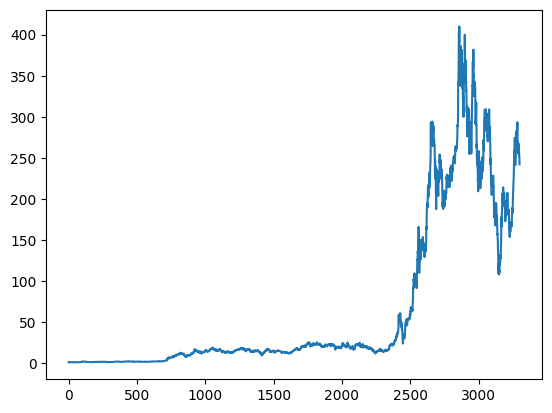

In [ ]:
df = stock_data.reset_index()['Close']
df.shape
plt.plot(stock_data['Close']);

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))
print(df)

[[0.00131893]
 [0.00130915]
 [0.00100428]
 ...
 [0.61234154]
 [0.60806194]
 [0.58969636]]


In [ ]:
train_len = int(len(df)*0.80)
test_len = int(len(df)-train_len)
train_data = df[0:train_len:]
test_data = df[train_len:len(df):1]

In [ ]:
train_len,test_len

(2640, 661)

In [ ]:
len(train_data),len(test_data)

(2640, 661)

In [ ]:
def create_dataset(dataset,time_step= 1):
  dataX,dataY =[],[]
  for i in range(len(dataset)-time_step - 1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX),np.array(dataY)

In [ ]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test = create_dataset(test_data,time_step)

In [ ]:
print(x_train.shape, y_train.shape)
print((x_test.shape),print(y_test.shape))

(2539, 100) (2539,)
(560,)
(560, 100) None


In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
model =Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
40/40 [==============================] - 9s 132ms/step - loss: 0.0012 - val_loss: 0.0054
Epoch 2/50
40/40 [==============================] - 5s 120ms/step - loss: 1.7045e-04 - val_loss: 0.0112
Epoch 3/50
40/40 [==============================] - 4s 104ms/step - loss: 1.3659e-04 - val_loss: 0.0067
Epoch 4/50
40/40 [==============================] - 4s 106ms/step - loss: 1.3094e-04 - val_loss: 0.0107
Epoch 5/50
40/40 [==============================] - 5s 115ms/step - loss: 1.1418e-04 - val_loss: 0.0082
Epoch 6/50
40/40 [==============================] - 4s 104ms/step - loss: 1.0702e-04 - val_loss: 0.0084
Epoch 7/50
40/40 [==============================] - 5s 120ms/step - loss: 1.0157e-04 - val_loss: 0.0061
Epoch 8/50
40/40 [==============================] - 4s 103ms/step - loss: 1.1157e-04 - val_loss: 0.0044
Epoch 9/50
40/40 [==============================] - 4s 104ms/step - loss: 8.9941e-05 - val_loss: 0.0043
Epoch 10/50
40/40 [==============================] - 5s 119ms/step -

In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

18/18 [==============================] - 0s 22ms/step


In [ ]:
train_predict =scaler.inverse_transform(train_predict)
test_predict= scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
math.sqrt(mean_squared_error(y_train,train_predict))

37.47006934556001

In [ ]:
look_back=100
trainPredictPlot=np.empty_like(df)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, : ] = train_predict

In [ ]:
testPredictPlot = np.empty_like(df)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1 : len(df)-1, :]= test_predict

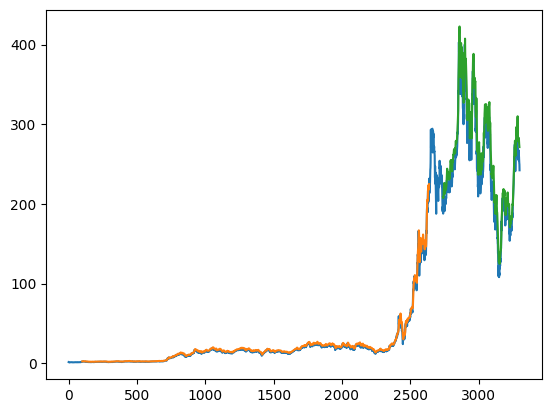

In [ ]:
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

661

In [ ]:
x_input = test_data[152:].reshape(1,-1)
x_input.shape

(1, 509)

In [ ]:
temp_input=list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.5759201236570771,
 0.5759771792916986,
 0.5769390525308692,
 0.5799633337519027,
 0.5673038669091376,
 0.5792541207931391,
 0.5761809567518045,
 0.5744120682309775,
 0.5861748511557371,
 0.5820338387380188,
 0.5567637927637618,
 0.5400855975868413,
 0.5590625545251678,
 0.546411260496723,
 0.5519461803890077,
 0.5731730187139253,
 0.5749582137356162,
 0.5771673093061591,
 0.5689830867936153,
 0.5777542381813596,
 0.5932341696572759,
 0.5971550956685384,
 0.5958263799606232,
 0.5944406061726004,
 0.5954024794117709,
 0.6111758569841422,
 0.6119502568185848,
 0.6127572721002411,
 0.5976034388502842,
 0.6030894759222678,
 0.6043040461241359,
 0.6135479808810337,
 0.6144935843016308,
 0.6165314762860191,
 0.5926309318357255,
 0.60013859351901,
 0.6103770120713201,
 0.6117627858593429,
 0.6286774106258735,
 0.6425107352190397,
 0.6312614847971909,
 0.6343183423376617,
 0.6295659584118494,
 0.6293540081374231,
 0.6344976796103601,
 0.6337313743346847,
 0.6354921267234819,
 0.6443448497433

In [ ]:
lst_output = []
n_steps = 100
i = 0
while i<30:
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[:n_steps])  # Use the first n_steps
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape(1, len(temp_input), 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)

0 day input [0.57592012 0.57597718 0.57693905 0.57996333 0.56730387 0.57925412
 0.57618096 0.57441207 0.58617485 0.58203384 0.55676379 0.5400856
 0.55906255 0.54641126 0.55194618 0.57317302 0.57495821 0.57716731
 0.56898309 0.57775424 0.59323417 0.5971551  0.59582638 0.59444061
 0.59540248 0.61117586 0.61195026 0.61275727 0.59760344 0.60308948
 0.60430405 0.61354798 0.61449358 0.61653148 0.59263093 0.60013859
 0.61037701 0.61176279 0.62867741 0.64251074 0.63126148 0.63431834
 0.62956596 0.62935401 0.63449768 0.63373137 0.63549213 0.64434485
 0.63772566 0.64298352 0.65421643 0.65858566 0.6644875  0.68463014
 0.70670474 0.70194415 0.70319137 0.72617893 0.73896064 0.83285102
 0.8276095  0.84344815 0.87538619 0.90551459 0.98262076 0.95279394
 0.98691664 1.         0.99362545 0.9454086  0.83174238 0.86797637
 0.86435702 0.8398288  0.82350111 0.8571999  0.88514365 0.89115139
 0.92431218 0.94046054 0.90146321 0.90714489 0.87936421 0.92425516
 0.93058896 0.89002649 0.88154879 0.82478908 0.8199

In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [ ]:
len(df)

3301

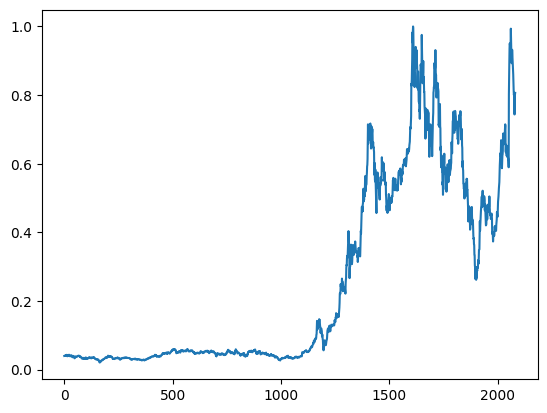

In [ ]:
df3= df.tolist()
df3.extend(lst_output)
plt.plot(df3[1250:]);